# Diabetes Prediction using Machine Learning

I am preparing a model for predicting whether the patient is diabetic or not!
For the Analysis, we will use data about following factors:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age

We are using the famous PIMA Diabetes Dataset for our training and testing purpose.
In this project, we have used two algorithms of Machine Learning:
    1) Support Vector Machine
    2) Logistic Regression Method

On the basis of their accuracy score, we will choose the best fit model and make our predictive system.

# Importing the Dependencies 

Libraries Required : Numpy, Pandas, ScikitLearn, Matplotlib, Seaborn

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Collection

Data used: PIMA Diabetes Dataset

In [3]:
#loading the diabetes dataset to pandas dataframe
diabetes_dataset = pd.read_csv('diabetes.csv')

In [4]:
#printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#number of rows and columns in the dataset
diabetes_dataset.shape

(768, 9)

In [6]:
#getting the statistical meausre of data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#value count of each class
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 -> Non-Diabetic

1 -> Diabetic

In [8]:
#mean of each class
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
#separating the data and labels
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Analysis

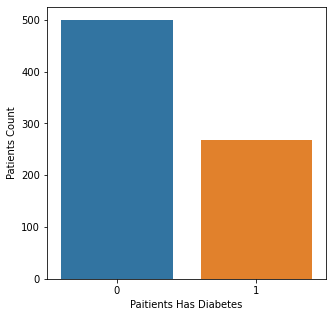

In [12]:
#plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(5,5))
sns.countplot(x ='Outcome', data=diabetes_dataset)
plt.xlabel('Paitients Has Diabetes')
plt.ylabel('Patients Count')
plt.show()

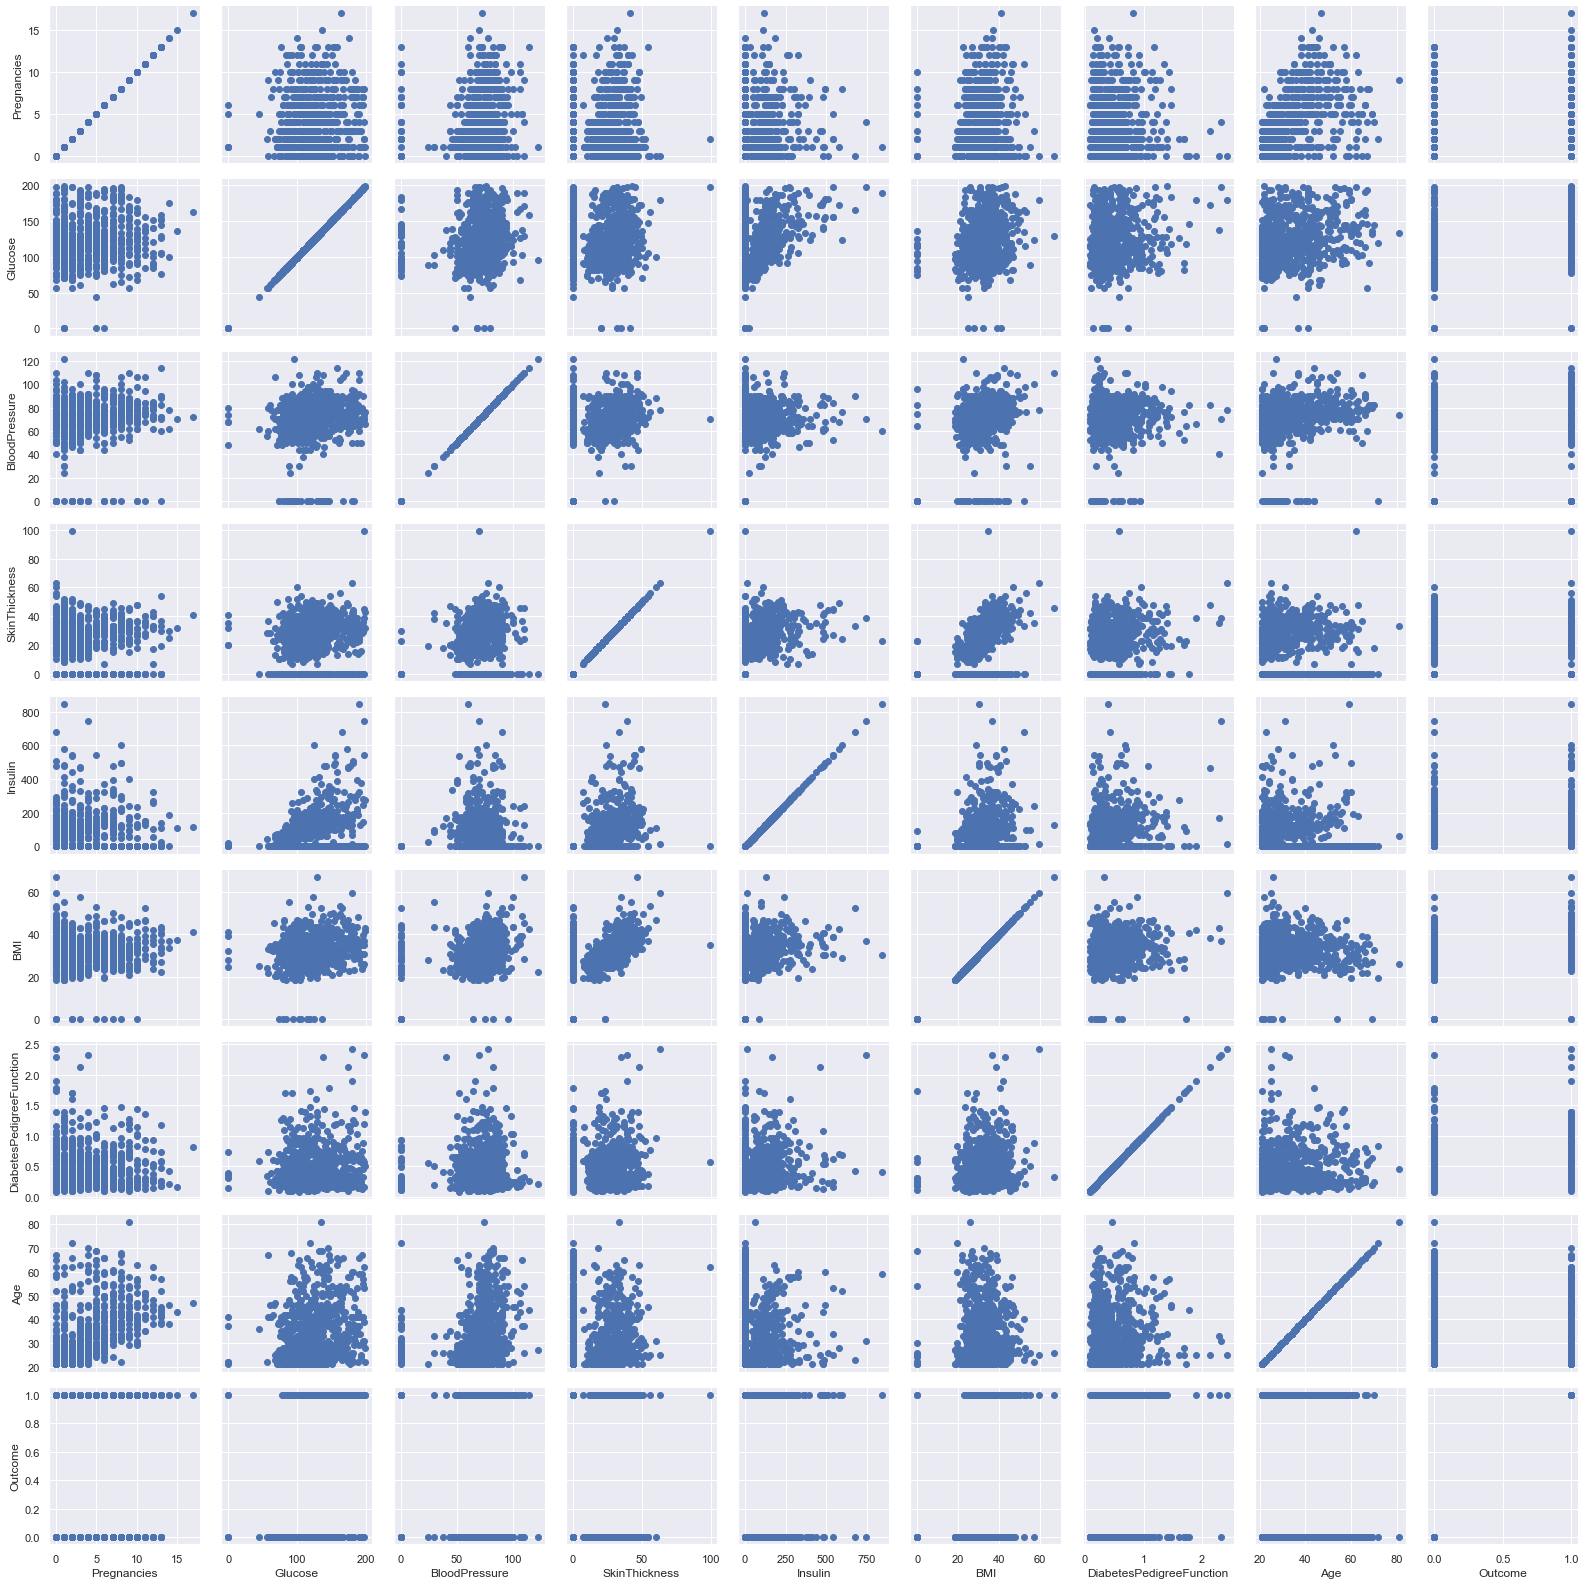

In [13]:
sns.set(style='darkgrid')
species_col = sns.PairGrid(diabetes_dataset)
species_col.map(plt.scatter)

Analyzing Attributes Distribution

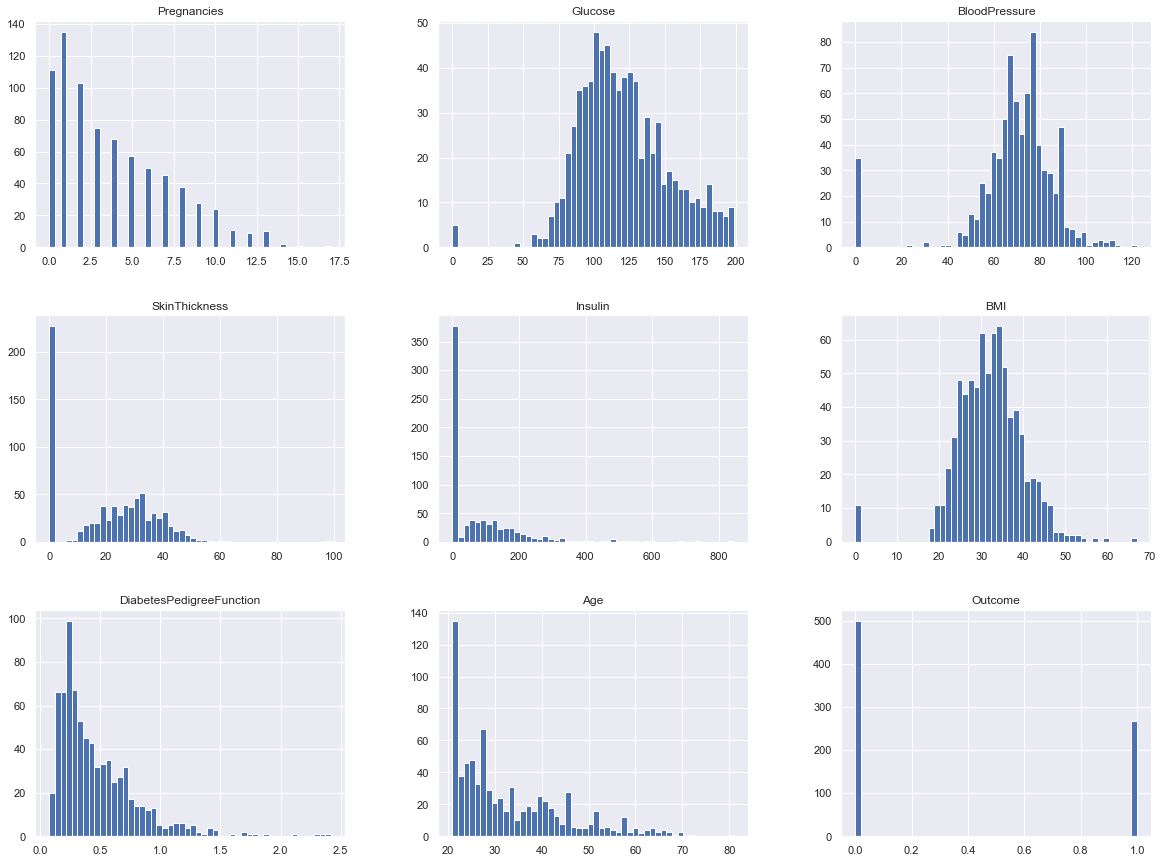

In [14]:
# Histogram
diabetes_dataset.hist(bins=50, figsize=(20, 15))
plt.show()

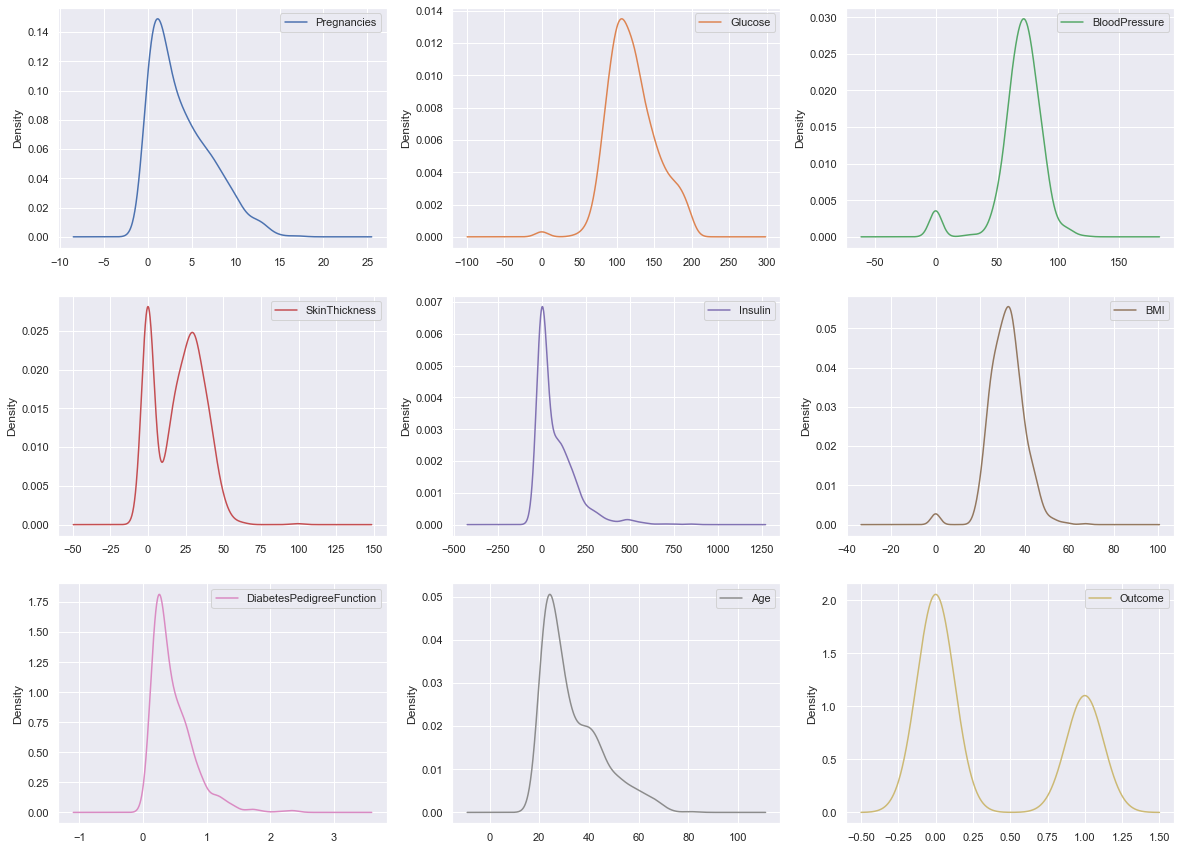

In [15]:
# Density plots for all attributes to visualize the distribution of each attribute
diabetes_dataset.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

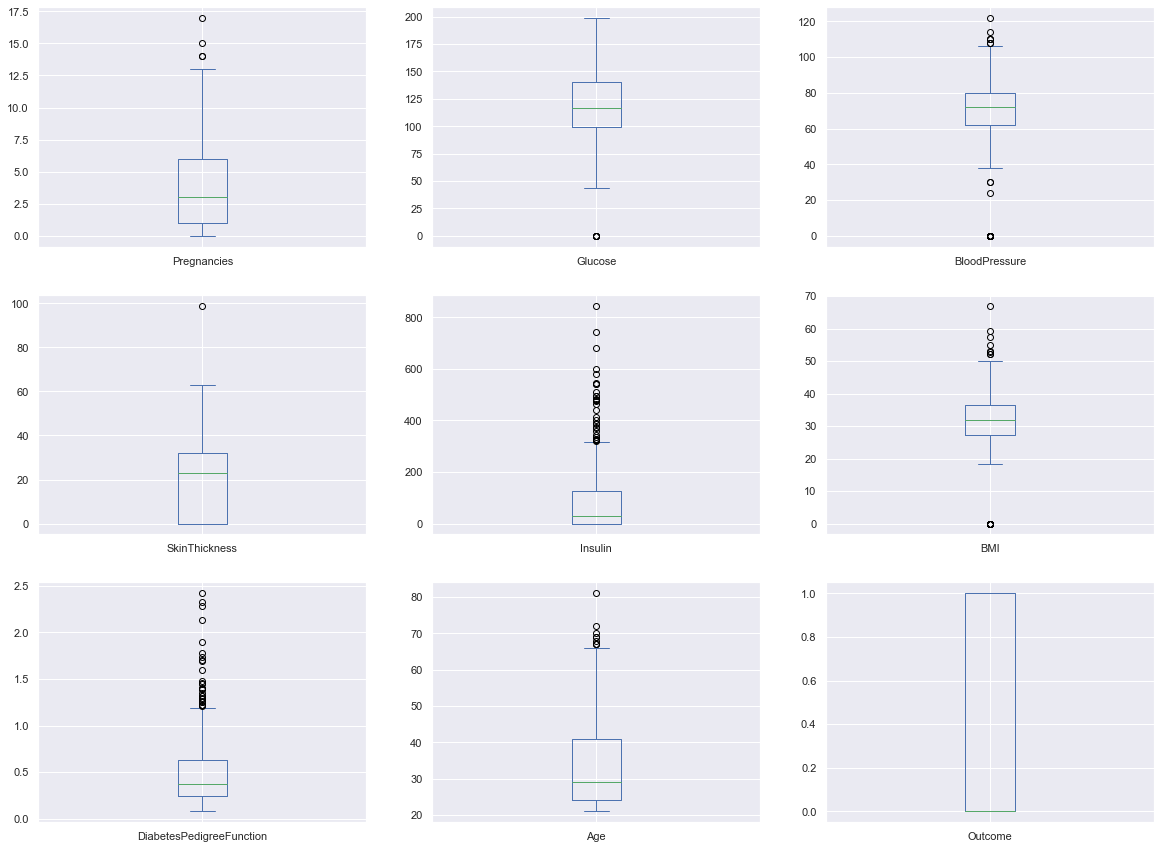

In [16]:
#Box and Whisker plot to visualize the distribution of all atributes
diabetes_dataset.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [17]:
#evaluating correlation coefficient between each factors
corr_analysis = diabetes_dataset.corr()
corr_analysis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

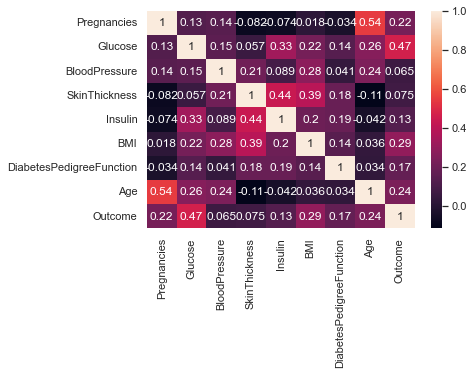

In [18]:
sns.heatmap(corr_analysis, annot = True)

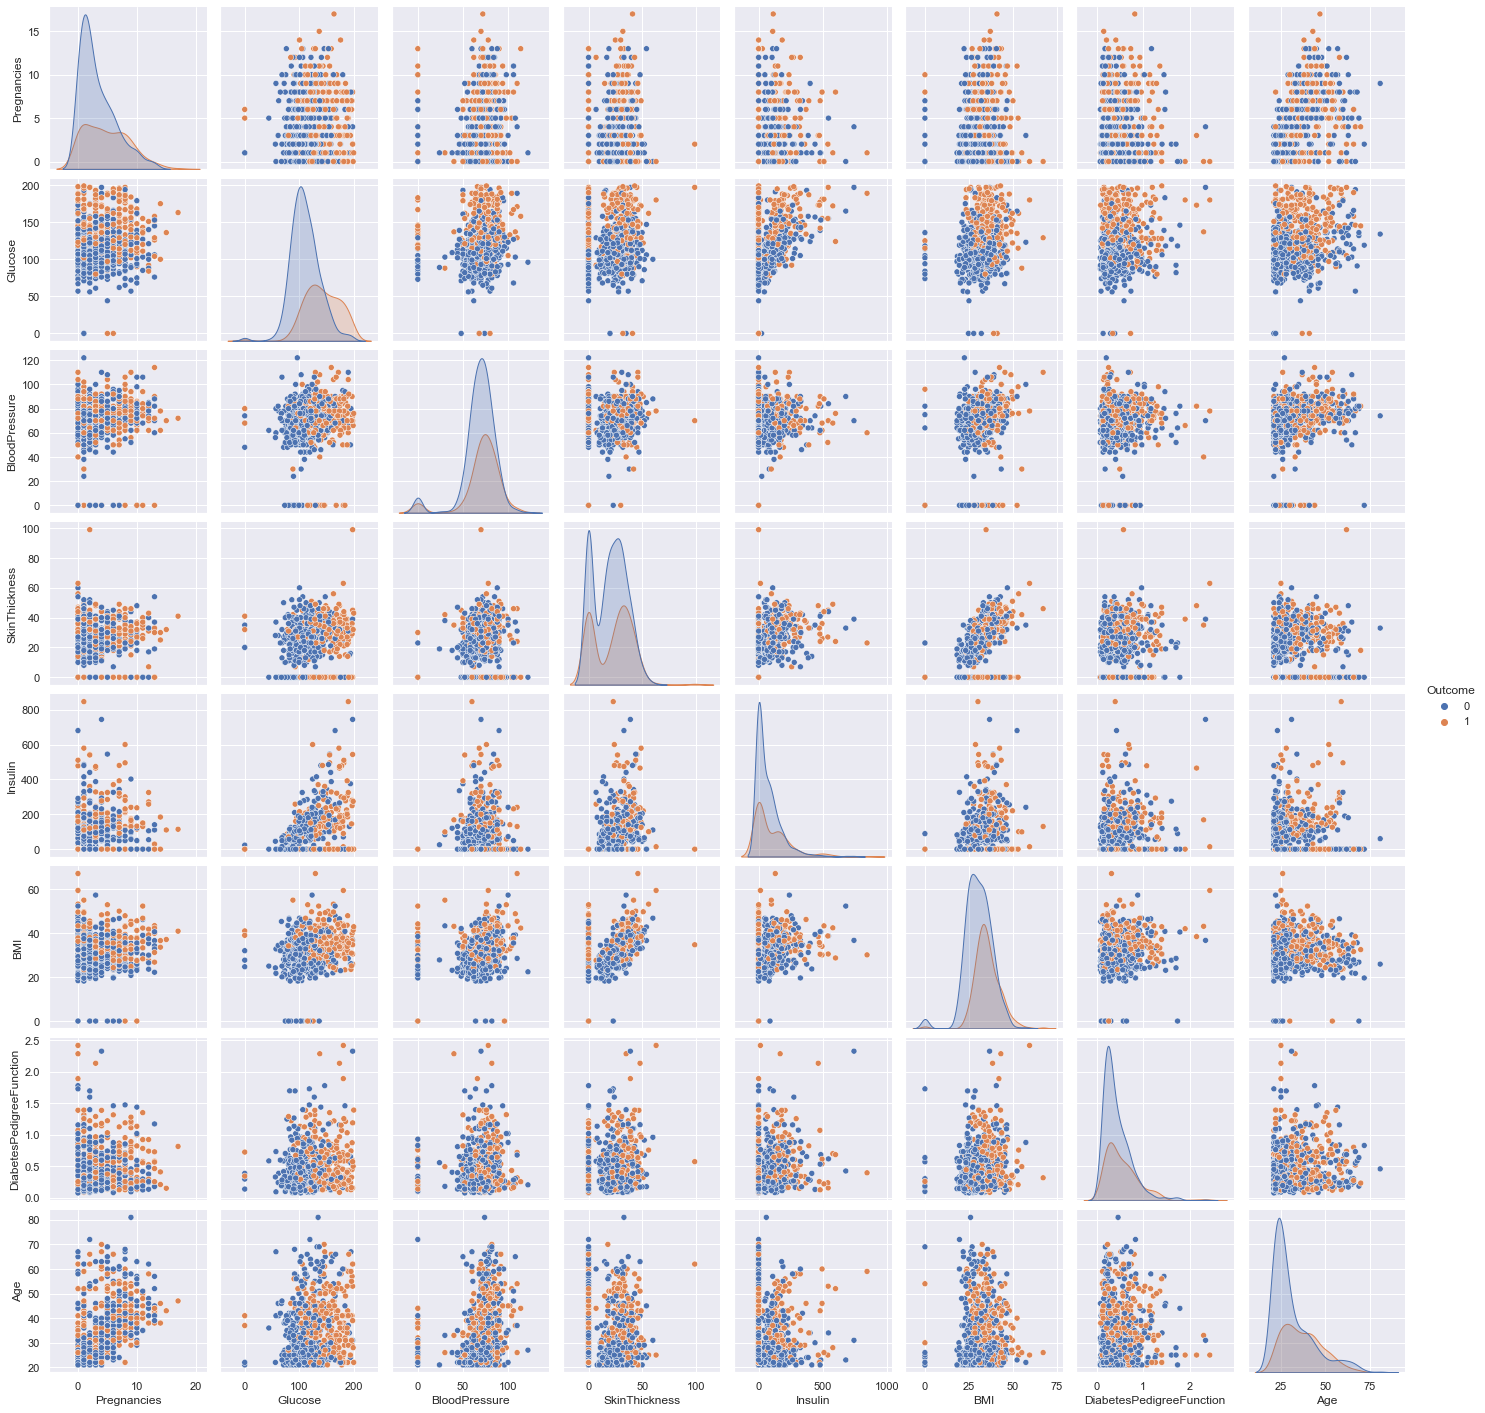

In [19]:
# Pairplot
sns.pairplot(diabetes_dataset, hue='Outcome')

Diabetic women tend to show larger values of age, BMI, insulin, skin thickness, blood pressure, and pregnancies.

The feature that it is possible to see 2 distinct groups (diabetic and non diabetic) is glucose.

# Data standardization

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X)

StandardScaler()

In [22]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
X = standardized_data
Y = diabetes_dataset['Outcome']

# Train - Test - Split

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


# Training the Model using Support Vector Machine (SVM) Method

In [26]:
classifier = svm.SVC(kernel='linear')
#training the support vector machine
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Evaluation (Accuracy Score) for SVM

Accuracy Score on the Training Data

In [27]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [28]:
print('Accuracy Score of the Training Data is : ',training_data_accuracy)

Accuracy Score of the Training Data is :  0.7801302931596091


Accuracy Score on the Testing Data

In [29]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [30]:
print('Accuracy Score of the Testing Data is : ',testing_data_accuracy)

Accuracy Score of the Testing Data is :  0.7792207792207793


# Evaluating Confusion Matrix for SVM

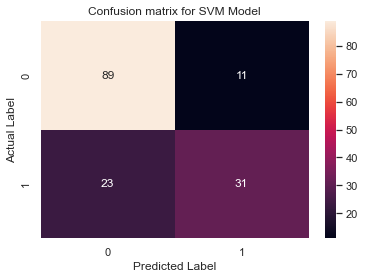

In [31]:
conf_matrix = metrics.confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for SVM Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Training the Model using Regression (Logistic Regression) Method

In [32]:
logreg = LogisticRegression()
#training the regression model
logreg.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation (Accuracy Score) for Regression Model

Accuracy Score on the Training Data

In [33]:
X_train_prediction = logreg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [34]:
print('Accuracy Score of the Training Data is : ',training_data_accuracy)

Accuracy Score of the Training Data is :  0.7801302931596091


Accuracy Score on the Testing Data

In [35]:
X_test_prediction = logreg.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [36]:
print('Accuracy Score of the Testing Data is : ',testing_data_accuracy)

Accuracy Score of the Testing Data is :  0.7792207792207793


# Evaluating Confusion Matrix for Regression

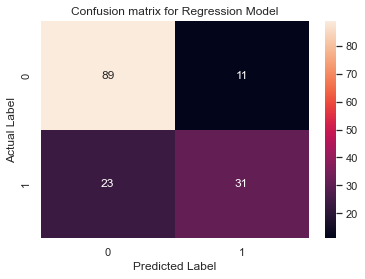

In [37]:
conf_matrix = metrics.confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Conclusion: 

From the evaluation of Accuracy Score, we can conclude that the Value of Correlation is between (0.60,0.79). So it is Highly Correlated.

Since both Models give same value of Accuracy, I am choosing our predictive system using the Regression Model.

# Making a Predictive System

INPUT 1:

In [38]:
#input data 1
input_data = (2,197,70,45,543,30.5,0.158,53)

In [39]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [40]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [41]:
#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]


C:\Users\Shivam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
prediction = logreg.predict(std_data)
print(prediction)

[1]


In [43]:
#output display for user
if prediction[0] == 0:
    print('The Patient is Not Diabetic')
else:
    print('The Patient is Diabetic')

The Patient is Diabetic


INPUT 2

In [44]:
#input data 2
input_data2 = (1,136,74,50,204,37.4,0.399,24)

In [45]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data2)

In [46]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [47]:
#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[-0.84488505  0.47275805  0.25303625  1.84819084  1.0784202   0.6863059
  -0.22009508 -0.78628618]]


C:\Users\Shivam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
prediction = logreg.predict(std_data)
print(prediction)

[0]


In [49]:
#output display for user
if prediction[0] == 0:
    print('The Patient is Not Diabetic')
else:
    print('The Patient is Diabetic')

The Patient is Not Diabetic
